# Compaction statistics

In [1]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt


# One jump
x1 = 0
x2 = 90
t1 = 0
t2 = 10.0
l = 50
s = 50
alphaf = 1
alphao = 0
c_linker = 10 / 10
c_nucleo = 150 / 35
landscape = np.array(l*[alphaf] + s*[alphao])
print(landscape)


# Compaction function
def calculate_compaction(landscape: np.ndarray, alphaf: float, alphao: float, c_linker: float, c_nucleo: float):
    
    n_alphaf = np.count_nonzero(landscape == alphaf)
    n_alphao = np.count_nonzero(landscape == alphao)
    c = ((c_linker * n_alphaf) + (c_nucleo * n_alphao)) / (n_alphaf + n_alphao)
    
    return c


# Calculation
delta_x = x2 - x1
delta_t = t2 - t1
delta_v = delta_x / delta_t
delta_bp = delta_v * calculate_compaction(landscape[x1:x2], alphaf, alphao, c_linker, c_nucleo)
print(delta_v, delta_bp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
9.0 22.14285714285714


In [3]:
import numpy as np

# Datas
x_list = np.array([0, 100, 200, 500])
t_list = np.array([0, 2.0, 4.0, 5.0])

l = 50
s = 50
alphaf = 1
alphao = 0
c_linker = 10 / 10
c_nucleo = 150 / 35

# Landscape
landscape = np.array(l*[alphaf] + s*[alphao] + l*[alphaf] + s*[alphao])

def calculate_compaction(segment, alphaf, alphao, c_linker, c_nucleo):
    n_alphaf = np.count_nonzero(segment == alphaf)
    n_alphao = np.count_nonzero(segment == alphao)
    n_tot = n_alphaf + n_alphao

    if n_tot == 0:
        return np.nan

    return ((c_linker * n_alphaf) + (c_nucleo * n_alphao)) / n_tot

# Deltas
delta_x = x_list[1:] - x_list[:-1]
delta_t = t_list[1:] - t_list[:-1]
delta_v = delta_x / delta_t

# Appliquer la compaction à chaque saut
delta_bp = np.zeros_like(delta_v, dtype=float)
for i in range(len(delta_v)):
    segment = landscape[x_list[i] : x_list[i+1]]
    c = calculate_compaction(segment, alphaf, alphao, c_linker, c_nucleo)
    delta_bp[i] = delta_v[i] * c

print("delta_x:", delta_x)
print("delta_t:", delta_t)
print("delta_v:", delta_v)
print("delta_bp:", delta_bp)


delta_x: [100 100 300]
delta_t: [2. 2. 1.]
delta_v: [ 50.  50. 300.]
delta_bp: [132.14285714 132.14285714          nan]


[ 657.30207827 1608.02707036   13.7240361   197.42209511   90.15910626
  146.36146216   62.1482744    53.58614653  668.29044291  204.84201924
  159.04719511   30.51614566  475.39837103  821.00558657   88.95169368
  287.78115929   88.59591205  407.35862456  983.64956339  399.92334302
  107.48715425]


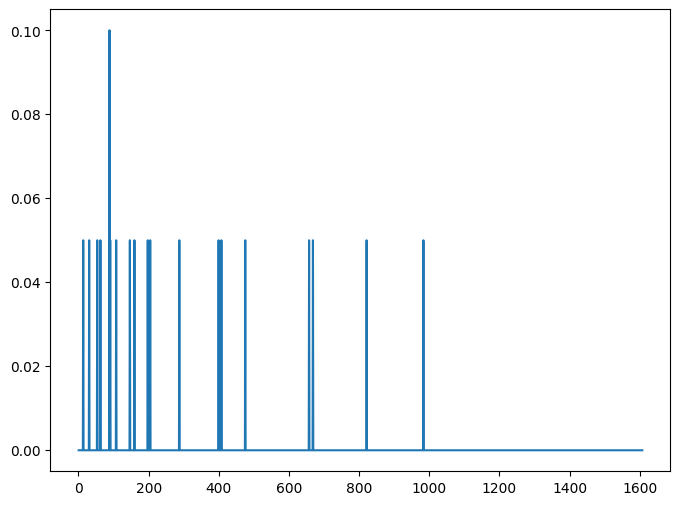

In [4]:
from ncl.landscape import alpha_matrix_calculation
from tls.utils import listoflist_into_matrix
from tls.utils import calculate_distribution

    
def calculate_compaction_statistics(alpha_matrix: np.ndarray, t_matrix: np.ndarray, x_matrix: np.ndarray):
    
    n = len(x_matrix)
    bp_matrix = np.full_like(x_matrix, np.nan, dtype=float)
    
    for i in range(n):
        t_list = t_matrix[i]
        x_list = x_matrix[i]
        alpha_list = alpha_matrix[i]
        
        # filtrer les indices valides (non NaN)
        valid = ~np.isnan(x_list)
        x_list_valid = x_list[valid]
        t_list_valid = t_list[valid]
        
        if len(x_list_valid) < 2:
            continue
        
        delta_x = x_list_valid[1:] - x_list_valid[:-1]
        delta_t = t_list_valid[1:] - t_list_valid[:-1]
        delta_v = delta_x / delta_t
        delta_bp = np.zeros_like(delta_v, dtype=float)
        
        for j in range(len(delta_v)):
            start = int(x_list_valid[j])
            end   = int(x_list_valid[j+1])
            segment = alpha_list[start:end]
            c = calculate_compaction(segment, alphaf, alphao, c_linker, c_nucleo)
            delta_bp[j] = delta_v[j] * c
            
        # mettre à jour la matrice finale
        bp_matrix[i, :len(delta_bp)] = delta_bp
        
    return bp_matrix[~np.isnan(bp_matrix)]


# # Datas
# x_matrix = [
#     [   0., 149., 0., 186., 186., 499., 186., 488., 488., 727., 727., 863.,
#         863., 1069., 863., 970., 970., 1194., 970., 1061., 970., 1231., 1231., 1595.,
#         1231., 1277., 1277., 1666., 1277., 1743., 1277., 1526., 1277., 1450., 1277., 1441.,
#         1277., 1385., 1277., 1413., 1277., 1441., 1441., 1653., 1441., 1585., 1441., 1594.,
#         1594., 1792., 1594., np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
#         np.nan, np.nan, np.nan],
#     [   0., 190., 0., 198., 198., 247., 247., 343., 247., 515., 515., 667.,
#         515., 649., 515., 731., 515., 673., 515., 729., 515., 621., 515., 886.,
#         515., 620., 515., 684., 684., 919., 684., 1066., 1066., 1375., 1066., 1264.,
#         1066., 1192., 1192., 1350., 1192., 1362., 1192., 1404., 1192., 1399., 1192., 1434.,
#         1192., 1363., 1363., 1535., 1363., 1483., 1363., 1530., 1363., 1555., 1555., 1801.,
#         1801., 2068., 1801.]
# ]

# t_matrix = [
#     [  0., 1.53501312, 2.76705233, 9.38632956, 10.1731703, 10.27000175, 11.5429027, 13.33500089,
#        13.36030852, 13.64604734, 15.64236991, 15.85606827, 18.40576965, 19.40938029, 20.25757304,
#        21.46076875, 21.60556143, 21.94307597, 26.9623338, 27.47145223, 27.74944194, 29.86894513,
#        29.93909307, 30.48590691, 32.91493983, 34.02918123, 34.20101977, 38.03439639, 38.24145434,
#        39.52950069, 39.98199789, 40.02875741, 40.10718368, 40.31066084, 40.60732778, 42.82396688,
#        50.20914332, 51.47745082, 51.61781776, 57.35952258, 66.01136125, 68.22715378, 68.30310263,
#        68.90869682, 69.65424721, 72.1804678, 73.08740107, 75.92553397, 81.79161283, 100.84967909,
#        102.28865833],
#     [  0., 0.40105896, 0.40534247, 4.26147513, 6.56921475, 6.68378068, 7.62153349, 8.35311082,
#        8.46764069, 8.58109428, 10.68019392, 17.412045, 19.16528018, 21.32458111, 23.93751976,
#        23.94898375, 25.45495524, 26.45979877, 30.56223811, 34.38229208, 35.21264867, 36.42016802,
#        38.81962168, 39.06913784, 39.72485988, 41.54070444, 42.05892939, 44.86706538, 45.19805341,
#        45.95907835, 47.02613392, 47.31989297, 50.21058759, 52.66668259, 54.01063917, 54.40671788,
#        54.70938906, 61.02987586, 61.38358516, 64.55649079, 65.23088788, 65.47200932, 69.17334701,
#        69.20146191, 75.26725578, 77.70450962, 79.48541547, 81.28307175, 83.60544889, 84.47094467,
#        87.64256584, 87.80509775, 88.1099016, 88.33629034, 89.07454323, 89.82677094, 94.26043243,
#        95.17787342, 96.14557297, 97.74141505, 97.77215681, 98.92789316, 101.73429505]
# ]


x_matrix = np.array([
    [0., 482., 735., 781., 846., 1004., 1393., 1433., 1521., 1800., 2369., 2500.,
     2576., 2877., 3070., 3218., 3479., 3649., 3771., 4103., 4198., 4489.],
    [0., 165., 504., 586., 692., 938., 1116., 1197., 1284., 1463., 1666., 2019.,
     2256., 2345., np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
])

t_matrix = np.array([
    [0., 2.98275556, 3.62027148, 17.98505861, 19.22967252, 26.37576947,
     37.31736945, 40.07574968, 46.5006512, 48.19153278, 56.44541967,
     57.5396091, 62.1226373, 85.55534062, 88.2280742, 89.1755219,
     92.5026684, 96.32216641, 96.5170365, 96.68160436, 96.94342507,
     116.91368661],
    [0., 4.13623857, 49.05391268, 49.79314233, 50.30645013, 61.78940823,
     64.32605796, 67.87346446, 68.75650526, 69.48295445, 71.57621275,
     82.74332193, 88.80797601, 92.05435857, 103.45100335,
     np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
])

# x_matrix = listoflist_into_matrix(x_matrix)
# t_matrix = listoflist_into_matrix(t_matrix)

# print(x_matrix)

# Parameters
s, l, bpmin = 150, 10, 0
alphaf, alphao = 1, 0
Lmin, Lmax, bps = 0, 2000, 1
nt = 2


# Landscape
alpha_matrix = alpha_matrix_calculation(
    "periodic", s, l, bpmin,
    alphaf, alphao, Lmin, Lmax, bps,
    nt
)


# Launch
work = calculate_compaction_statistics(alpha_matrix, t_matrix, x_matrix)
print(work)

points, distrib = calculate_distribution(data=work, first_bin=0.0, last_bin=np.max(work), bin_width=1)
plt.figure(figsize=(8,6))
plt.plot(points, distrib)
plt.show()

In [1]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-29__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=[
        "algorithm", "fact", "factmode",
        "landscape", "s", "l", "lmbda", "alphar"
        ])
)
print(df_all)

shape: (98, 50)
┌───────────┬───────┬──────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ algorithm ┆ fact  ┆ factmode ┆ landscape  ┆ … ┆ vi_bp_mean ┆ vi_bp_med  ┆ vi_bp_poin ┆ vi_bp_dis │
│ ---       ┆ ---   ┆ ---      ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ts         ┆ trib      │
│ str       ┆ bool  ┆ str      ┆ str        ┆   ┆ f64        ┆ f64        ┆ ---        ┆ ---       │
│           ┆       ┆          ┆            ┆   ┆            ┆            ┆ list[f64]  ┆ list[f64] │
╞═══════════╪═══════╪══════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 1         ┆ false ┆ none     ┆ homogeneou ┆ … ┆ null       ┆ null       ┆ []         ┆ []        │
│           ┆       ┆          ┆ s          ┆   ┆            ┆            ┆            ┆           │
│ 1         ┆ false ┆ none     ┆ homogeneou ┆ … ┆ null       ┆ null       ┆ []         ┆ []        │
│           ┆       ┆          ┆ s          ┆   ┆            ┆            ┆

shape: (1, 50)
┌───────────┬───────┬──────────┬───────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ algorithm ┆ fact  ┆ factmode ┆ landscape ┆ … ┆ vi_bp_mean ┆ vi_bp_med  ┆ vi_bp_poin ┆ vi_bp_dist │
│ ---       ┆ ---   ┆ ---      ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ts         ┆ rib        │
│ str       ┆ bool  ┆ str      ┆ str       ┆   ┆ f64        ┆ f64        ┆ ---        ┆ ---        │
│           ┆       ┆          ┆           ┆   ┆            ┆            ┆ list[f64]  ┆ list[f64]  │
╞═══════════╪═══════╪══════════╪═══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 2         ┆ false ┆ none     ┆ periodic  ┆ … ┆ 2961.96949 ┆ 420.837821 ┆ [0.5, 1.5, ┆ [0.0,      │
│           ┆       ┆          ┆           ┆   ┆ 5          ┆            ┆ … 9999.5]  ┆ 0.00008, … │
│           ┆       ┆          ┆           ┆   ┆            ┆            ┆            ┆ 0.00008]   │
└───────────┴───────┴──────────┴───────────┴───┴────────────┴────────────┴──

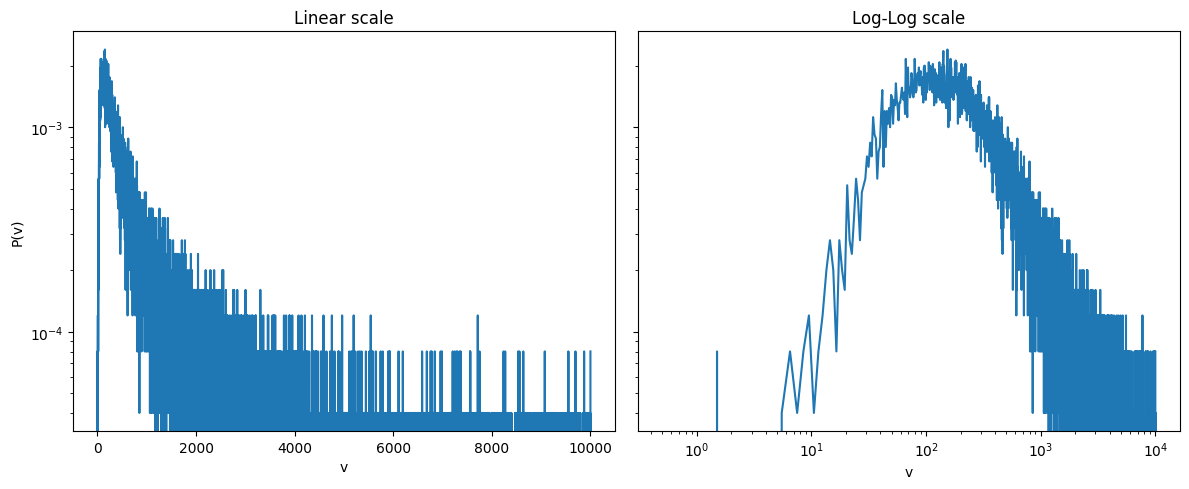

In [2]:
algorithm_w = "2"
landscape_w = "periodic"
fact_x = "false"
alphar_w = 0.00


df_one = df_all.filter(
    (pl.col("algorithm") == algorithm_w) &
    (pl.col("landscape") == landscape_w) &
    (pl.col("fact") == fact_x) &
    (pl.col("alphar") == alphar_w)
)
print(df_one)


vi_bp_points = df_one["vi_bp_points"][0].to_numpy()
vi_bp_distrib = df_one["vi_bp_distrib"][0].to_numpy()
print(vi_bp_points)


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].plot(vi_bp_points, vi_bp_distrib)
axes[0].set_title("Linear scale")
axes[0].set_xlabel("v")
axes[0].set_ylabel("P(v)")
axes[1].plot(vi_bp_points, vi_bp_distrib)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Log-Log scale")
axes[1].set_xlabel("v")
plt.tight_layout()
plt.show()